<a href="https://colab.research.google.com/github/marcosbaccin/Plano_de_saude/blob/main/Plano_de_Saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1° Problema de Negócio

#### Desenvolver uma metodologia para previsão do valor do plano de Saúde para seus beneficiários.

# 2° Análise Exploratória

In [2]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Train dataset:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciência de Dados na Prática/Plano de Saúde/Train_Data.csv')
# Top 5 records:
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [4]:
# Shape of dataset:
train_data.shape

(3630, 7)

In [5]:
# Cheacking for NaN Values (Missing Values):
train_data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [6]:
# Insights of dataset:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [7]:
# Description of dataset (Numerical):
train_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Description of dataset (Categorical):
train_data.describe(include=['O'])

,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


#### Medical Insurance Charges:

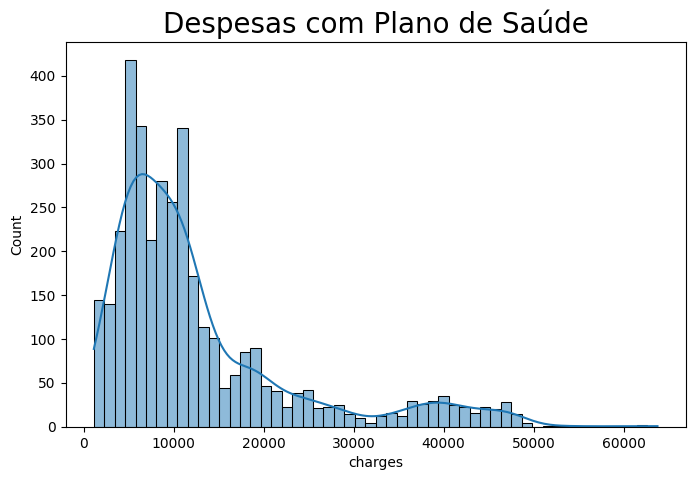

In [9]:
# Histrogram of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.histplot(train_data['charges'], kde=True)
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show()

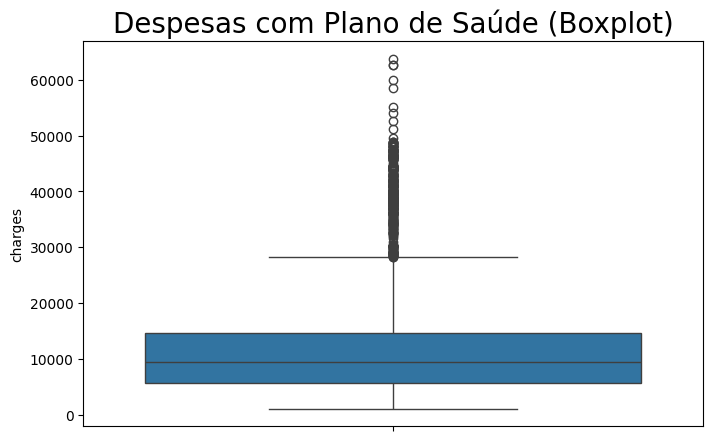

In [10]:
# Boxplot of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.boxplot(train_data['charges'])
plt.title('Despesas com Plano de Saúde (Boxplot)', fontsize=20)
plt.show()

#### Age:

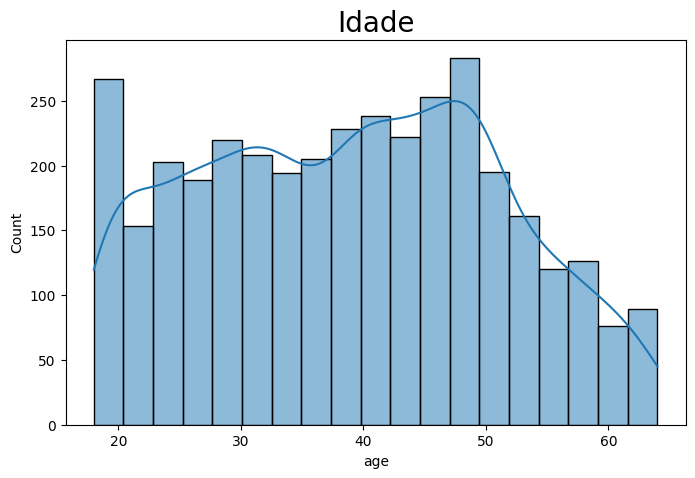

In [11]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(train_data['age'], kde=True)
plt.title('Idade', fontsize=20)
plt.show()

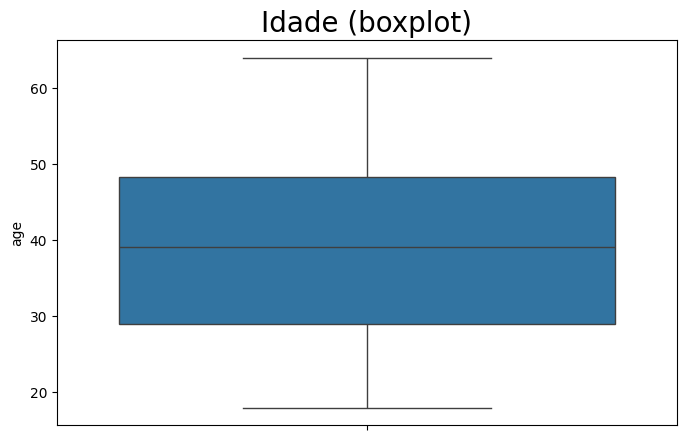

In [12]:
# Boxplot of Age:
plt.figure(figsize=(8,5))
sns.boxplot(train_data['age'])
plt.title('Idade (boxplot)', fontsize=20)
plt.show()

#### Body Mass Index:

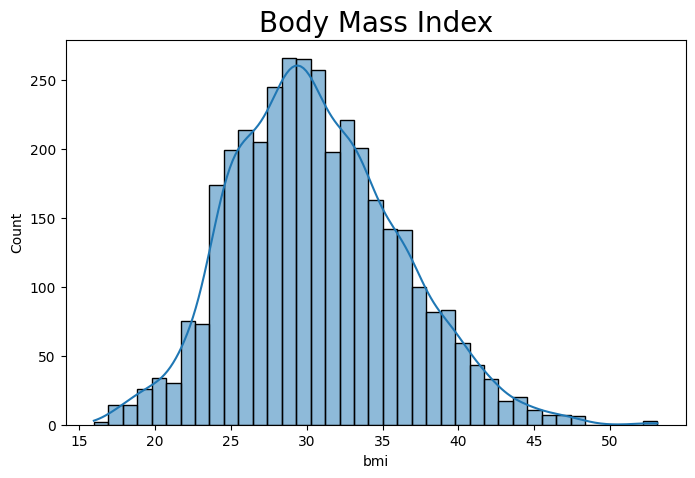

In [13]:
# Histrogram of Body Mass Index:
plt.figure(figsize=(8,5))
sns.histplot(train_data['bmi'], kde=True)
plt.title('Body Mass Index', fontsize=20)
plt.show()

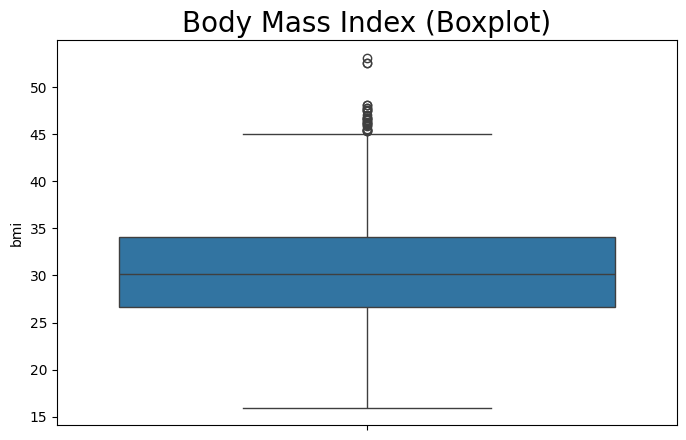

In [14]:
# Boxplot of Body Mass Index:
plt.figure(figsize=(8,5))
sns.boxplot(train_data['bmi'])
plt.title('Body Mass Index (Boxplot)', fontsize=20)
plt.show()

#### children:

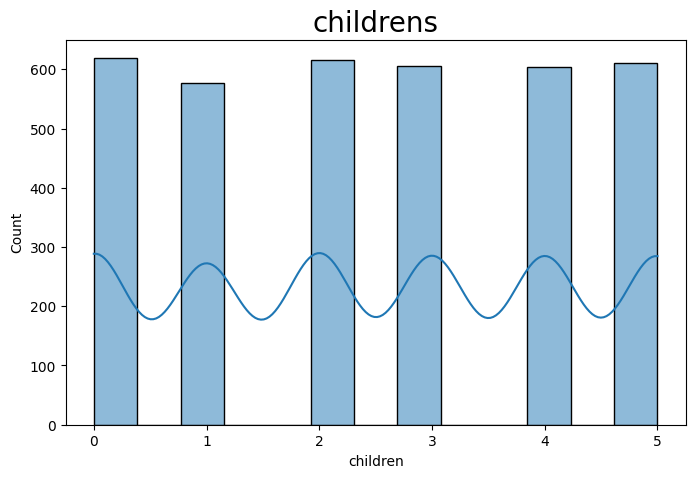

In [15]:
# Histrogram of children:
plt.figure(figsize=(8,5))
sns.histplot(train_data['children'], kde=True)
plt.title('childrens', fontsize=20)
plt.show()

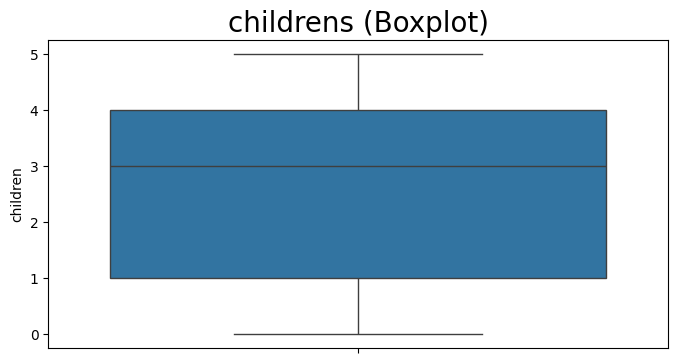

In [16]:
# Boxplot of children:
plt.figure(figsize=(8,4))
sns.boxplot(train_data['children'])
plt.title('childrens (Boxplot)', fontsize=20)
plt.show()

#### Sex:

Male   : 2029
Female : 1601


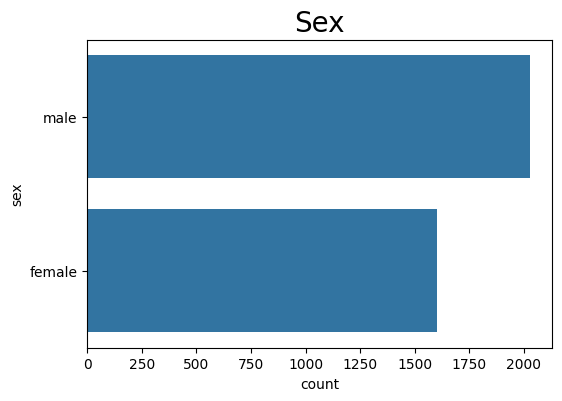

In [17]:
# Value Counts:
print("Male   :", train_data['sex'].value_counts()[0])
print("Female :", train_data['sex'].value_counts()[1])

# Visualization:
plt.figure(figsize=(6,4))
sns.countplot(train_data['sex'])
plt.title('Sex', fontsize=20)
plt.show()

#### Smokers:

Smokers     : 560
Non-Smokers : 3070


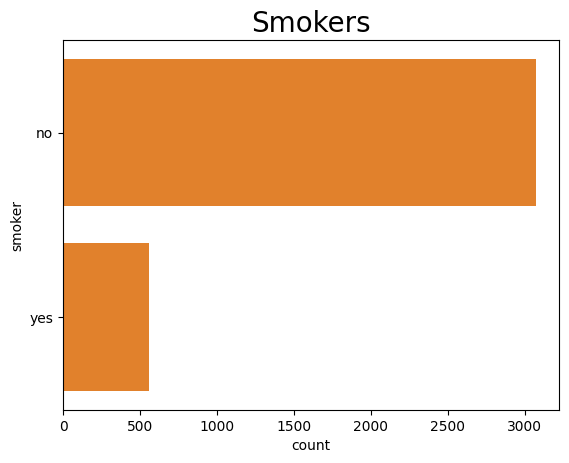

In [18]:
# Value Counts:
print("Smokers     :", train_data['smoker'].value_counts()[1])
print("Non-Smokers :", train_data['smoker'].value_counts()[0])

# Visualization:
sns.countplot(train_data['smoker'])
sns.countplot(train_data['smoker'])
plt.title('Smokers', fontsize=20)
plt.show()

#### Region:

South-East region : 1021
North-West region : 911
South-West region : 850
North-East region : 848


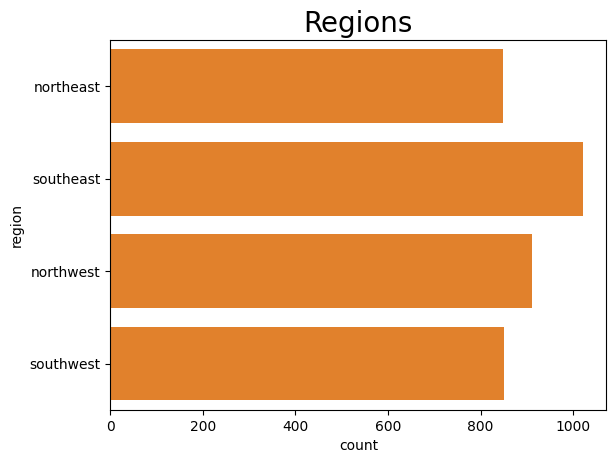

In [19]:
# Value Counts:
print("South-East region :", train_data['region'].value_counts()[0])
print("North-West region :", train_data['region'].value_counts()[1])
print("South-West region :", train_data['region'].value_counts()[2])
print("North-East region :", train_data['region'].value_counts()[3])

# Visualization:
sns.countplot(train_data['region'])
sns.countplot(train_data['region'])
plt.title('Regions', fontsize=20)
plt.show()

In [20]:
# top 5 records:
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


#3° Pré-Processamento dos Dados

In [21]:
# Arredondar a Variável AGE:
train_data['age'] = round(train_data['age'])

In [22]:
# top 5 records, after rounding up & down Age:
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.745000,no,northeast,2,3279.868550
1,37.0,female,25.744165,yes,southeast,3,21454.494239
2,18.0,male,30.030000,no,southeast,1,1720.353700
3,37.0,male,30.676891,no,northeast,3,6801.437542
4,58.0,male,32.010000,no,southeast,1,11946.625900


In [23]:
# OHEncoding: Transformar variáveis em numéricas
train_data = pd.get_dummies(train_data, drop_first=True)

In [24]:
# top 2 records, after encoding:
train_data.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0


In [25]:
# Columns of dataset:
train_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [26]:
# Rearranging columns to see better:
train_data = train_data[['age','sex_male','smoker_yes','bmi','children','region_northwest','region_southeast','region_southwest','charges']]
train_data.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,21.0,1,0,25.745000,2,0,0,0,3279.868550
1,37.0,0,1,25.744165,3,0,1,0,21454.494239


In [27]:
# Splitting Independent & Dependent Feature:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [28]:
# top 2 records of Independent feature:
X.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest
0,21.0,1,0,25.745000,2,0,0,0
1,37.0,0,1,25.744165,3,0,1,0


In [29]:
# top 2 records of Dependent Feature:
y.head(2)

0     3279.868550
1    21454.494239
Name: charges, dtype: float64

In [30]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# 4° e 5° Construção e Avaliação da Máquina Preditiva


###Vamos Criar a metodologia de previsão do valor do custo do plano de saúde que é a própria máquina preditiva.

In [31]:
# Importing métricas de avaliação:
from sklearn.metrics import mean_squared_error, r2_score

### MP com Regressão Linear

In [32]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7482602892322037
30898859.03596079


### MP com Regressão Ridge

In [33]:
# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.748102888431925
30918178.614604652


### MP com Regressão Lasso

In [34]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7482269824960902
30902947.14800708


### MP com Random Forest

In [35]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9095426393282471
11102853.926529214


### Salvamento da Máquina Preditiva para Deploy ou implementação

In [36]:
# Creating a pickle file for the classifier
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))